<a href="https://colab.research.google.com/github/yoavwolf97/Data-scienc-project-/blob/main/Data_science_seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn as scikit_learn


**Importing** the data 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

Data processing

In [ ]:
##delete id coloumn 
df = df.drop('id', axis=1)
df.iloc[3116,0] ='Male'


In [ ]:
## fill bmi na with the avg value 
df['bmi'].isna().sum()
df['bmi'].fillna((df['bmi'].mean()),inplace=True)

In [ ]:
##standardize 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['bmi','age','avg_glucose_level']
df[cols] = scaler.fit_transform(df[cols])

In [ ]:
##Creating Dummy varibles 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first')
ohe.fit_transform(df[['gender','ever_married','work_type','Residence_type','smoking_status']]).toarray()
featuer_array=ohe.fit_transform(df[['gender','ever_married','work_type','Residence_type','smoking_status']]).toarray()
featuer_labels = ['is_Male','is_ever_married','Never_worked','Private','Self-employed','children','Urban','formerly smoked','never smoked','smokes']
featuers = pd.DataFrame(featuer_array, columns = featuer_labels )
df = pd.concat([df,featuers],axis=1)
df = df.drop(df.columns[[0, 4, 5,6,9]], axis=1)


Desiciosn Trees

Desicion Tree Regression (example unrelated to the data)


In [ ]:
## Decision Tree Regression
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15, 10))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

We can see that if the maximum depth of the tree (controlled by the max_depth parameter) is set too high, the decision trees learn too fine details of the training data and learn from the noise, meaning  they overfit.

Bias - variance tradeoff

Desicion Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import cross_val_score


feature_cols = list(df.columns)
feature_cols.remove('stroke')
X = df.drop('stroke', axis=1)
y = df.stroke

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
model_1 = clf.fit(X_train,y_train)

#Cross validation
D_trees_cv = cross_val_score(model_1, X_train, y_train, cv=10)
np.mean(D_trees_cv)



0.9172597530632365

In [ ]:
#Predict the response for test dataset
y_pred = model_1.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9021526418786693


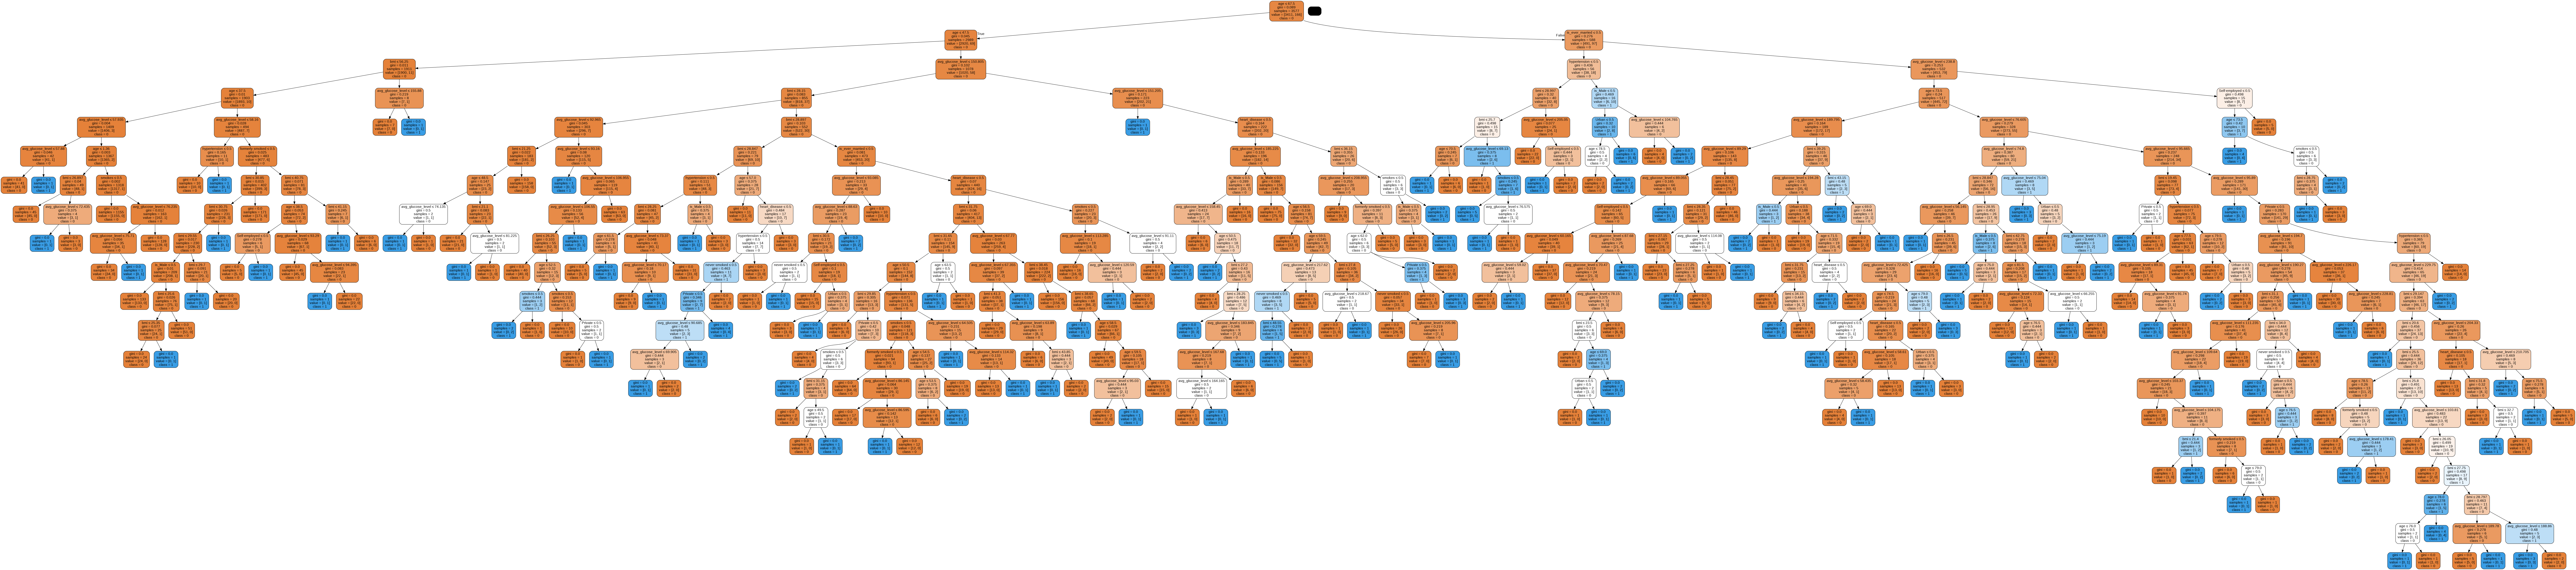

In [ ]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


Notice - criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

(criterion="entropy", max_depth=3)

Random forest 

In [ ]:
#Import Random Forest Model and cross validation 
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model_2 = clf.fit(X_train,y_train)

#Cross Validation
R_forest_cv = cross_val_score(model_2, X_train, y_train, cv=10)
np.mean(R_forest_cv)


0.9530350687761139

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
y_pred=model_2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9432485322896281


Finding Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


RandomForestClassifier(n_jobs=1)

In [ ]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

avg_glucose_level    0.270912
age                  0.247269
bmi                  0.233804
Urban                0.033714
is_Male              0.033638
heart_disease        0.026270
hypertension         0.026127
Private              0.024438
never smoked         0.024278
is_ever_married      0.023610
formerly smoked      0.019238
Self-employed        0.017578
smokes               0.017506
children             0.001607
Never_worked         0.000011
dtype: float64

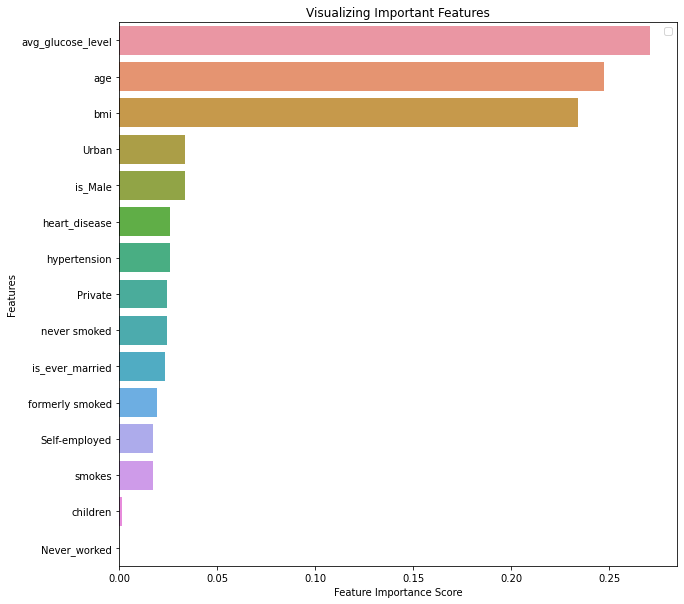

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()



Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model_3 = abc.fit(X_train, y_train)

#Cross Validation
Ada_Boost_cv = cross_val_score(model_3, X_train, y_train, cv=10)
np.mean(Ada_Boost_cv)


0.9519169679044802

In [ ]:
#Predict the response for test dataset
y_pred = model_3.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9452054794520548


XGBoost

In [ ]:
import xgboost as xgb

# Create adaboost classifer object
xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Train XgBoost Classifer
model_4 = xgb.fit(X_train, y_train)

#Cross Validation
Xg_Boost_cv = cross_val_score(model_4, X_train, y_train, cv=10)
np.mean(Xg_Boost_cv)


0.95387227516705

In [ ]:
#Predict the response for test dataset
y_pred = model_4.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9458577951728636


Cross validation Box plot

In [ ]:
col_names = ['Xgb_Boost','Ada_Boost','R_forest','D_trees']
scores = (Xg_Boost_cv,Ada_Boost_cv,R_forest_cv,D_trees_cv)

df1 = pd.DataFrame( data = scores )
df1 = pd.DataFrame(data= np.array(df1).T, columns = col_names)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

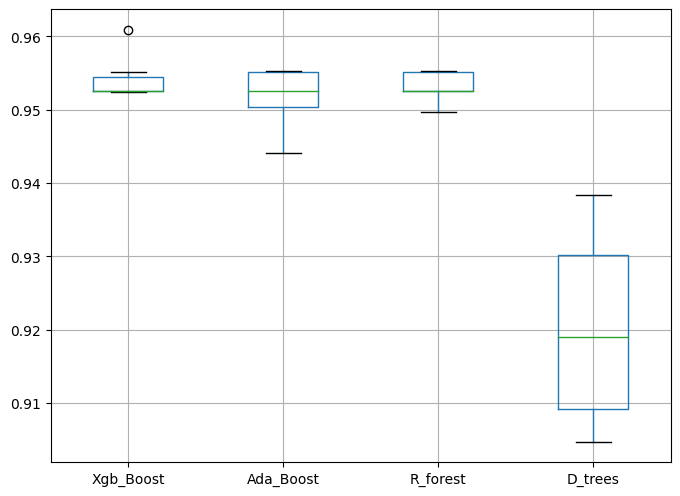

In [ ]:

figure(figsize=(8, 6), dpi=100)
plot = df1.boxplot(column=col_names)
plt.plot